# Assignment 2 Part 2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code and you should able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [9]:
import matplotlib
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (30 marks for undergrad) (20 marks for grad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 25 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

In [10]:
# Your code goes here
img = np.array(mpimg.imread('cube.jpg'))
#img

cube_length = 19  #each block length in cube is 19mm

# 30 points selected on cube
world_coordinates = np.array([[0, 1 ,2, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
                              [0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2],
                              [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 3, 3]])

world_coordinates = cube_length * world_coordinates
print (world_coordinates.shape)

image_coordinates = np.array([[1601, 1706, 1798, 1877, 1487, 1386, 1294, 1605, 1610, 1614, 
                              1711, 1711, 1715, 1803, 1807, 1812, 1877, 1891, 1895, 
                              1496, 1496, 1496, 1386, 1382, 1382, 1294, 1289, 1294, 
                              1605, 1592],
                              
                              [1478, 1421, 1369, 1329, 1421, 1373, 1333, 1342, 1193, 1048, 
                              1294, 1154, 1013, 1250, 1110, 978, 1210, 1070, 943, 
                              1294, 1149, 1009, 1250, 1110, 978, 1206, 1070, 939, 
                              973, 904]])
                              
                              #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                             

print (image_coordinates.shape)

(3, 30)
(2, 30)


<IPython.core.display.Javascript object>


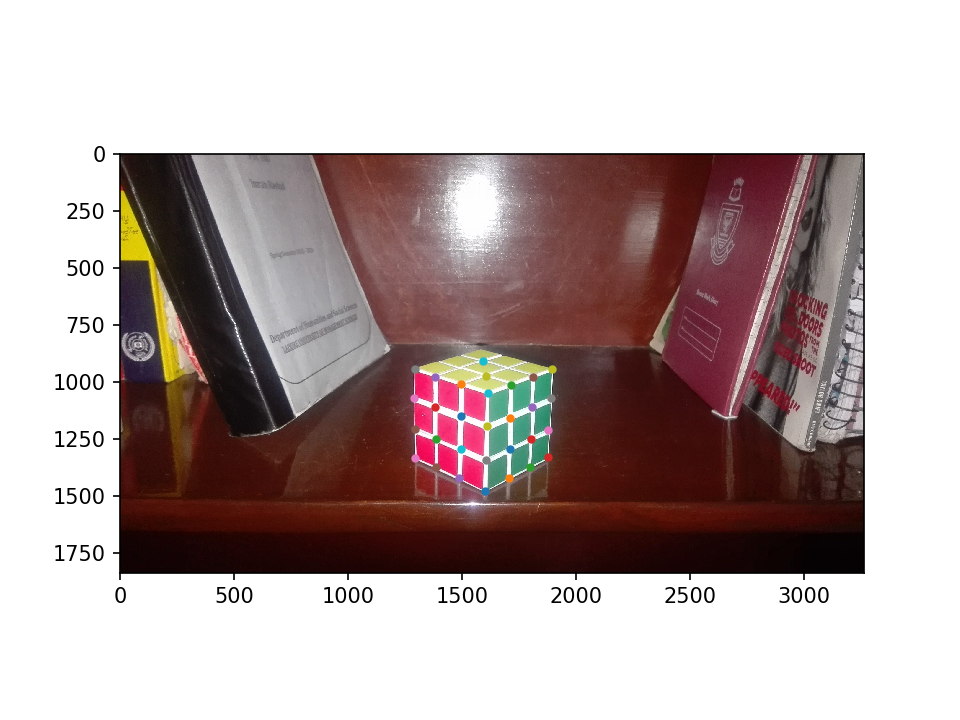

In [11]:
%matplotlib notebook
figure(dpi = 150)
#plt.axis('off') # allows us to turn off axis, comment this out to show axis
plt.imshow(img)
for i in range (30):
    plt.plot(image_coordinates[0, i], image_coordinates[1, i], marker = '.')
    #print (i)
plt.show()

In [23]:
selected_points = world_coordinates.shape[1]
print (selected_points)

#print (image_coordinates)

A_matrix = np.empty([2*selected_points, 12], dtype=int)
print (A_matrix.shape)
index = 0

for i in range (selected_points):
    #print (world_coordinates[:, i])
    world_point = world_coordinates[:, i]
    X = world_point[0]
    Y = world_point[1]
    Z = world_point[2]
    
    #print (i)
    image_point = image_coordinates[:, i]
    x = image_point[0]
    y = image_point[1]
    #print(x)
    
    A_matrix[index, :] = [X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]
    A_matrix[index+1, :] = [0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]
    
    index += 2
    #print(y)

#print (A_matrix)
U, S, V = np.linalg.svd(A_matrix)
last_row = np.array(V[V.shape[1]-1, :])
#print (last_row)

P = last_row.reshape(3, 4)
print (P)

30
(60, 12)
[[-4.20157348e-03  1.35390022e-03  5.67105747e-04 -7.35067941e-01]
 [-1.97152549e-04  1.70154489e-05  3.87820581e-03 -6.77967569e-01]
 [-1.06325623e-06 -8.82636245e-07  4.01147811e-07 -4.58561538e-04]]


In [46]:
#create empty array
fourth_row = np.ones((1, selected_points))
print (fourth_row.shape)

#shape = (4, selected_points)
new_worldcoordinates = np.concatenate((world_coordinates, fourth_row), axis=0)
print (new_worldcoordinates.shape)

(1, 30)
(4, 30)


In [53]:
backproject = np.matmul(P, new_worldcoordinates)
backproject = backproject/backproject[2, :]
#print (backproject)

<IPython.core.display.Javascript object>


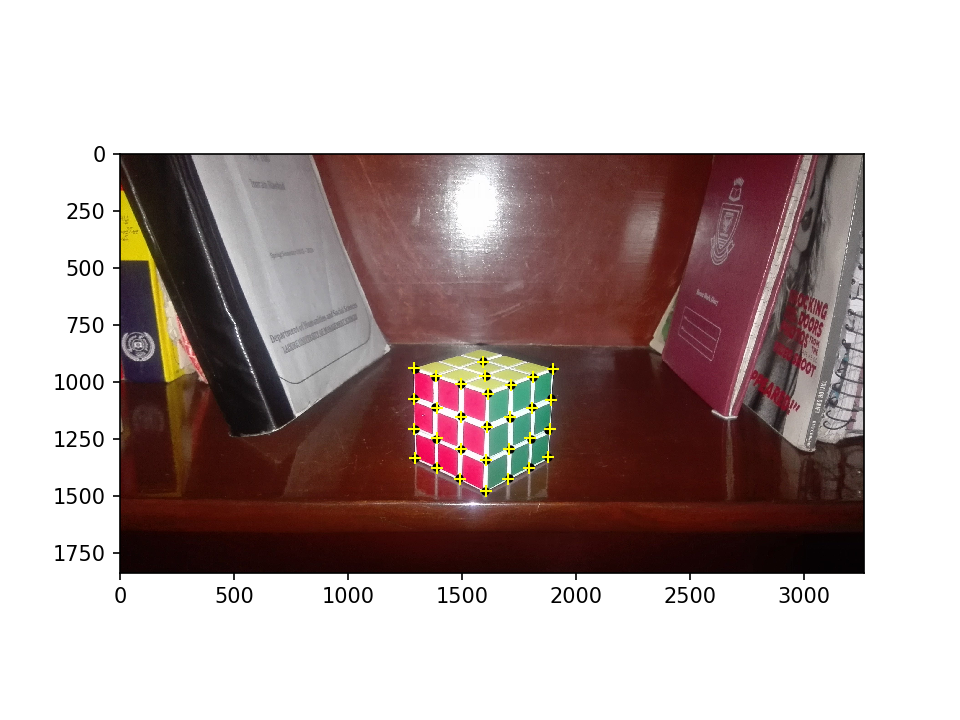

In [60]:
%matplotlib notebook
figure(dpi = 150)
#plt.axis('off') # allows us to turn off axis, comment this out to show axis
plt.imshow(img)
for i in range (30):
    plt.plot(image_coordinates[0, i], image_coordinates[1, i], marker = '.', color = 'black')
    plt.plot(backproject[0, i], backproject[1, i], marker = '+', color='yellow')
    #print (i)
plt.show()

In [73]:
img_backproject = backproject[0:2, :]
error_values =  img_backproject - image_coordinates 
#print (error_values)
error = np.linalg.norm(error_values)
#for average error, divide total error by number of points
print (error/30)

0.8773425188563785


In [27]:
#https://leohart.wordpress.com/2010/07/23/rq-decomposition-from-qr-decomposition/
#code copied from above link for RQ Factorization

import scipy
#from scipy.linalg.decomp import qr

def rq(A):
    '''Implement rq decomposition using QR decomposition
 
    From Wikipedia,
     The RQ decomposition transforms a matrix A into the product of an upper triangular matrix R (also known as right-triangular) and an orthogonal matrix Q. The only difference from QR decomposition is the order of these matrices.
     QR decomposition is Gram-Schmidt orthogonalization of columns of A, started from the first column.
     RQ decomposition is Gram-Schmidt orthogonalization of rows of A, started from the last row.
    '''
    #A = np.asarray(A)
 
    m, n = A.shape
 
    # Reverse the rows
    reversed_A = np.flipud(A)
 
    # Make rows into column, then find QR
    Q, R = scipy.linalg.qr(np.transpose(reversed_A))
 
    # The returned R is flipped updown, left right of transposed R
    R = np.flipud(np.transpose(R))
    R[:,0:m-1] = R[:,m-1:0:-1]
 
    # The returned Q is the flipped up-down of transposed Q
    Q = np.transpose(Q)
    Q[0:m-1, :] = Q[m-1:0:-1, :]
 
    return R, Q

## Part 2 (10 marks for both)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [29]:
def qr_decomp(P_matrix): #you can decide what input this function takes
    #user should pass complete P_matrix
    R, K = np.linalg.qr(P_matrix[:, 0:3])
    return K, R

## Part 3 (30 marks for undergrad) (20 marks for grad)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

In [32]:
# Your code goes here
def cam_centre(P_matrix):
    U, S, V = np.linalg.svd(P_matrix)
    
    last_row = np.array(V[V.shape[1]-1, :])
    temp = last_row/last_row[3]
    return temp

In [35]:
U_temp, S_temp, V_temp = np.linalg.svd(P)

#V_transpose = V_temp.transpose()
#print (V.shape)

last_row_V = np.array(V_temp[V_temp.shape[1]-1, :])
print (last_row_V)
camera_centre = last_row_V/last_row_V[3]
print (camera_centre)

[-0.64914696 -0.57171778  0.50173472  0.00304452]
[-213.2184082  -187.78606713  164.79947473    1.        ]


In [33]:
camera_centre = cam_centre(P)
print (camera_centre)

[-213.2184082  -187.78606713  164.79947473    1.        ]


In [34]:
K, R = qr_decomp(P)
#normalize K
K = K/K[2][2]
print (K)
print (R)

[[-41.57799252  13.37639131   7.39651866]
 [ -0.          -0.45944507  38.01778481]
 [ -0.          -0.           1.        ]]
[[-9.98900875e-01  4.68623096e-02  9.82632638e-04]
 [-4.68719290e-02 -9.98553769e-01 -2.63323516e-02]
 [-2.52783292e-04 -2.63494670e-02  9.99652761e-01]]


<IPython.core.display.Javascript object>


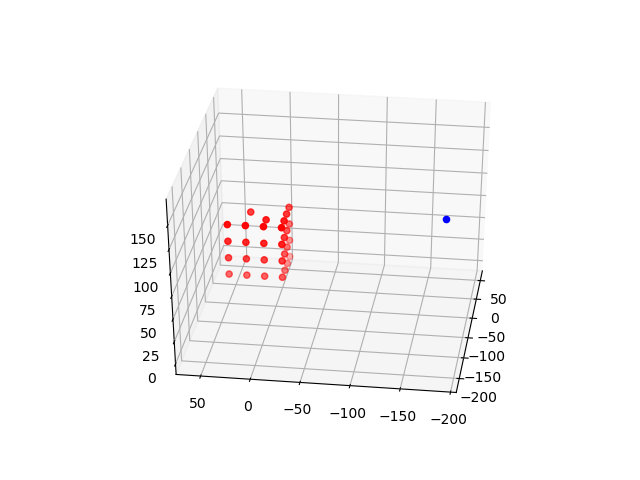

In [84]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(camera_centre[0], camera_centre[1], camera_centre[2], color = 'blue')
ax.scatter3D(world_coordinates[0, :], world_coordinates[1, :], world_coordinates[2, :], color = 'red')
#ax.scatter3D(K[0, :], K[1, :], K[2, :], color = 'yellow')
#ax.scatter3D(R[0, :], R[1, :], R[2, :], color = 'green')


## Part 4 (20 marks for both)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. Also compute the angle between the image axes. The following link may be useful to look up sensor information:
https://www.ephotozine.com/article/complete-guide-to-image-sensor-pixel-size-29652
### now re-plot everything along with the principal point of camera

In [81]:
# Your code goes here
#size of camera sensor is 4.8mm by 3.6mm
#image size is 3264 by 1836

mx = 1836/3.6
my = 3264/4.8

fx = abs(K[0][0]/mx)
fy = abs(K[1][1]/my)
print (fx, fy)
focal_length = (fx+fy)/2
print (focal_length)

0.08152547552104751 0.0006756545167629849
0.04110056501890525


## Part 5 (10 marks for both)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [8]:
# your answer/code goes here

#Linear regression can be used with test-split data method to minimize overall error in world coordinates to image coordinates

#Zhang's camera caliberation method can be used which is more recent method and relies on flat surface

#image coordinates will be more precise if better mouse and large image size is used to mark points

## Part 6 (Grad Only, 20 marks for this part)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [9]:
# your answer/code goes here